In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from plotly import express as plo
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
pl.style.use('seaborn-whitegrid')

In [2]:
train=pd.read_csv('/Users/rissu/Downloads/Compressed/drive-download-20200502T100031Z-001/train_V2.csv')
test=pd.read_csv('/Users/rissu/Downloads/Compressed/drive-download-20200502T100031Z-001/test_V2.csv')

In [3]:
train.shape,test.shape

((4446966, 29), (1934174, 28))

In [4]:
train.head(3).T

,0,1,2
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae
assists,0,0,1
boosts,0,0,0
damageDealt,0,91.47,68
DBNOs,0,0,0
headshotKills,0,0,0
heals,0,0,0
killPlace,60,57,47


In [5]:
test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [6]:
train['Id'].nunique(),train['groupId'].nunique(),train['matchId'].nunique()

(4446966, 2026745, 47965)

In [7]:
train.groupby('matchId')['matchType']

In [8]:
train.groupby('matchId')['matchId'].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
                 ... 
fffd74b5150cb4     97
fffe53015be300     97
fffe562611d981     94
fffe721f841f85     97
fffe92232706aa     93
Name: matchId, Length: 47965, dtype: int64

In [9]:
a=train.groupby('matchType')['matchType'].count()

In [10]:
a=a.sort_values(ascending=True)

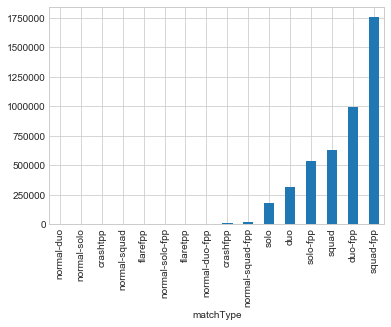

In [11]:
a.plot.bar()

In [12]:
a=a[[2,12,14]]

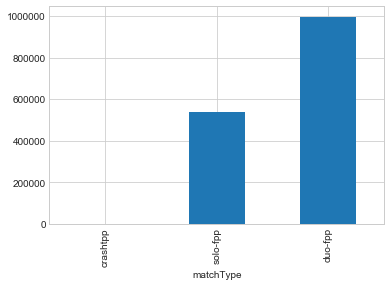

In [13]:
a.plot(kind='bar')
pl.show()

In [14]:
a=[1,2,3,4,5]
b=[6,7,8,9,10]

In [15]:
match=train.groupby('matchType')['matchId'].size().to_frame('players in match')
group=train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')


In [16]:
def mergelist(list1,list2):
    return list(itertools.product(list1,list2))

In [17]:
matches=pd.concat([match.groupby('matchType').describe()[mergelist(['players in match'],['min','max','mean'])],
           group.groupby('matchType').describe()[mergelist(['players in group'],['min','max','mean'])]],axis=1)


In [18]:
a=match.groupby('matchType').describe()


In [19]:
a.columns=a.columns.get_level_values(1)

In [20]:
a=a.reset_index()

In [21]:
a=a[['matchType','min','max','mean']]

In [22]:
a=a.loc[[2,12,14]]

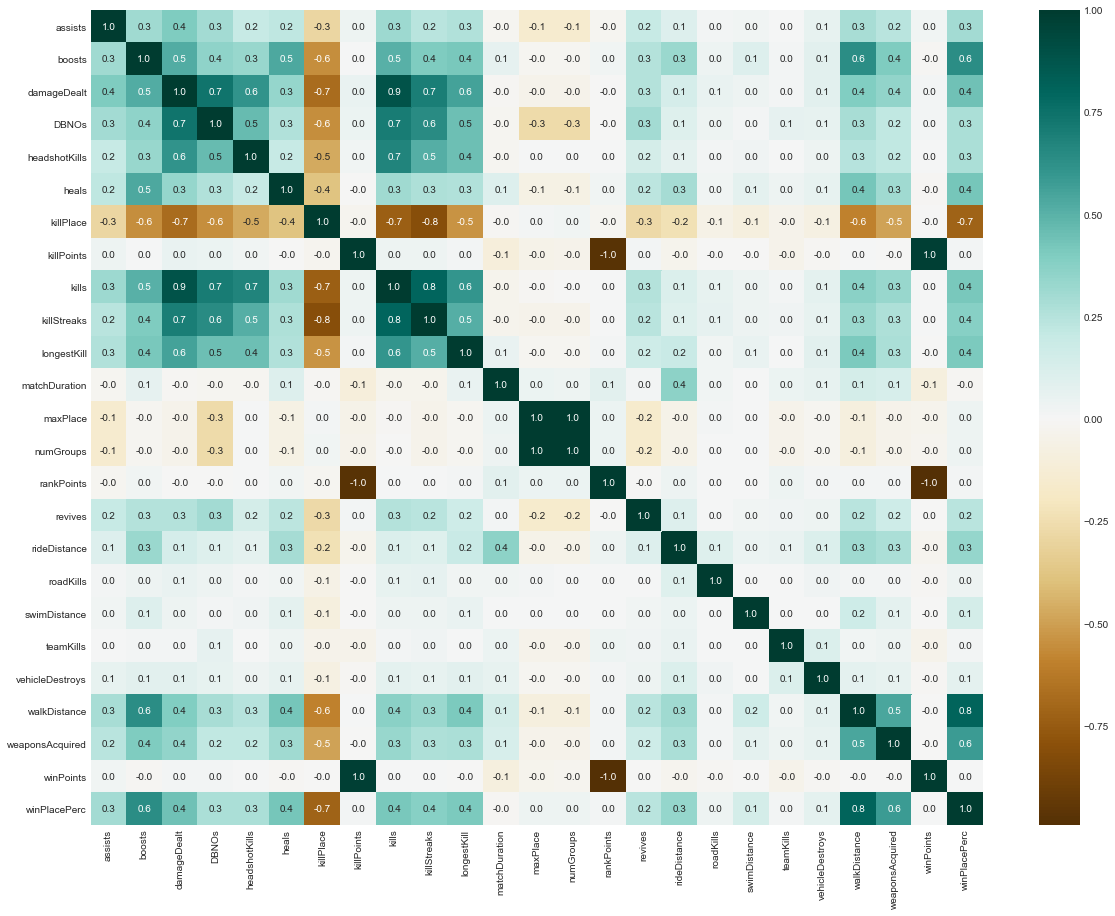

In [23]:
corr=train.corr()
f,ax=pl.subplots(figsize=(20,15))
sns.heatmap(corr,ax=ax,annot=True,fmt='.1f',cmap='BrBG')

In [24]:
train['kills'].mean(),train['kills'].min(),train['kills'].max()

(0.9247833241810259, 0, 72)

In [38]:
data=train.copy()

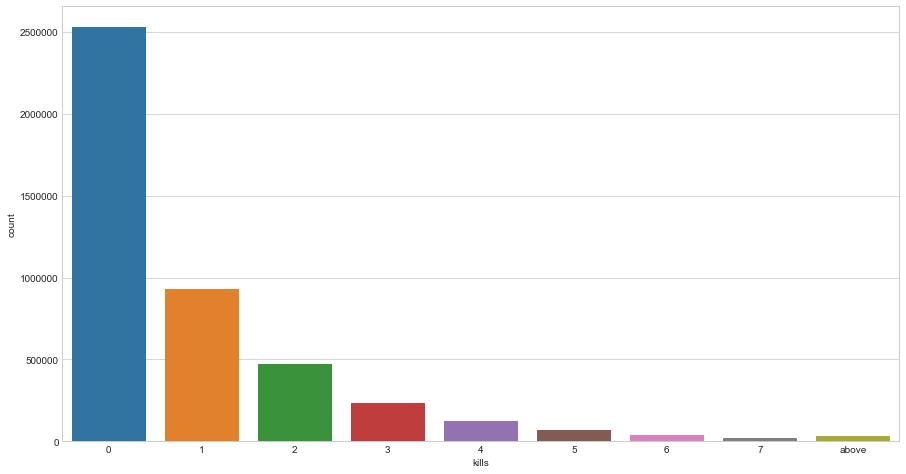

In [30]:
data.loc[data['kills']>data['kills'].quantile(0.99)]='above'
pl.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())


In [37]:
# data.loc[data['kills']>data['kills'].quantile(0.99)]='a'

In [39]:
data['kills'].max()

72

In [40]:
data['kills'].min()

0

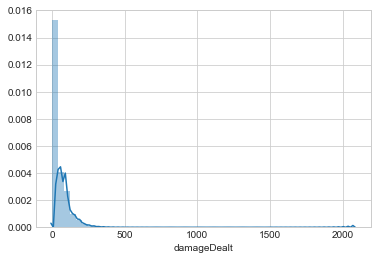

In [41]:
a=data[data['kills']==0]
sns.distplot(a['damageDealt'])

In [42]:
a=a[a['winPlacePerc']==1]

In [43]:
(len(a)/len(train))*100

0.3747723728942384

In [44]:
a=a[a['damageDealt']==0]

In [45]:
(len(a)/len(train))*100

0.10589242193441552

In [46]:
kills=train.copy()

In [47]:
kills['killsCategories']=pd.cut(kills['kills'],[-1,0,2,5,10,60])

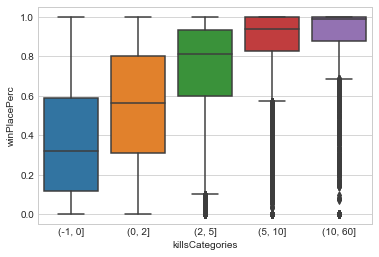

In [48]:
sns.boxplot(x='killsCategories',y='winPlacePerc',data=kills)

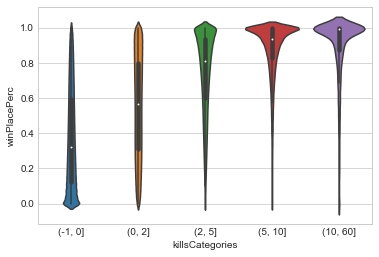

In [49]:
sns.violinplot(x='killsCategories',y='winPlacePerc',data=kills)

In [56]:
df=pd.DataFrame(np.arange(10))

In [59]:
df.quantile(0.99)

0    8.91
Name: 0.99, dtype: float64

In [61]:
data=train.copy()

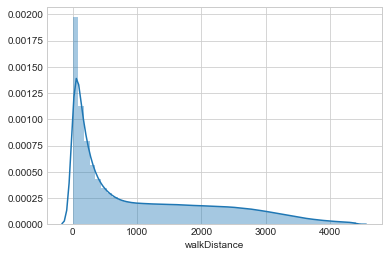

In [62]:
data=data[data['walkDistance']<train['walkDistance'].quantile(0.99)]
sns.distplot(data['walkDistance'])

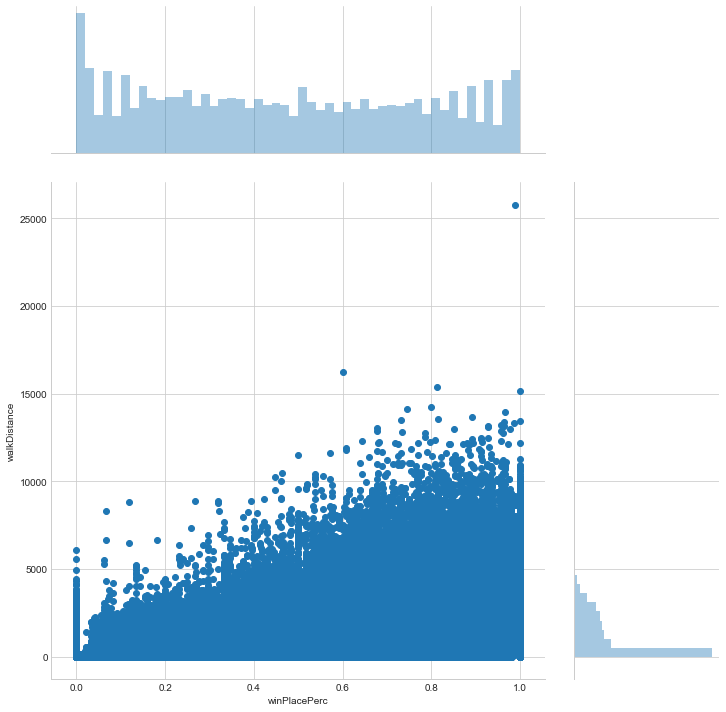

In [64]:
sns.jointplot(x='winPlacePerc',y='walkDistance',data=train,height=10,ratio=3)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

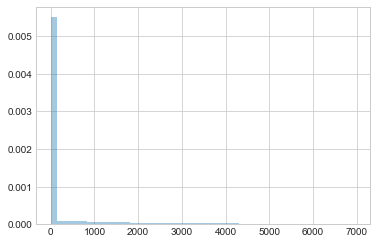

In [65]:
data=train.copy()
data=data[data['rideDistance']<train['rideDistance'].quantile(0.99)]
sns.distplot(data['rideDistance'])

In [66]:
data=train.copy()
len(data[data['rideDistance']==0])

3309429

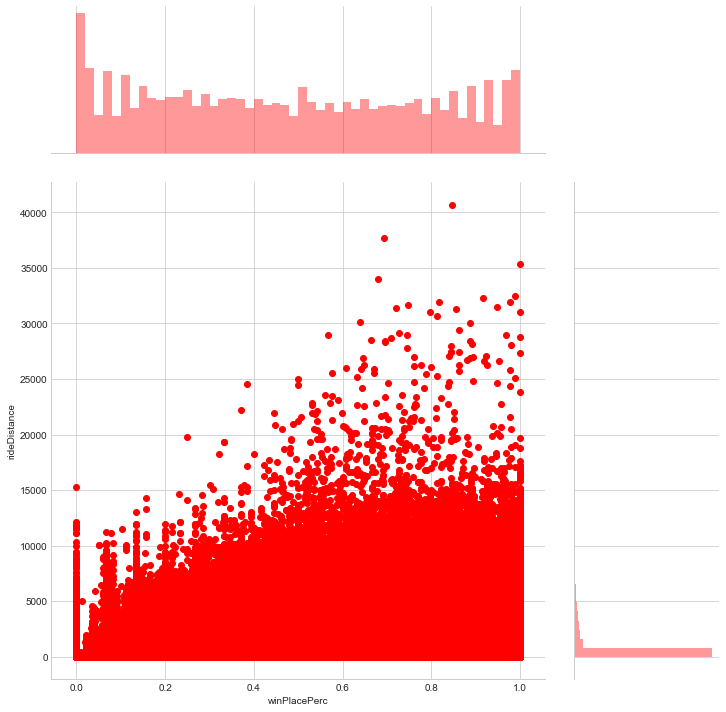

In [74]:
sns.jointplot(x='winPlacePerc',y='rideDistance',data=train,height=10,ratio=3,color='r')

In [ ]:
sns.jointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='lime')